In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:

df=pd.read_csv(r'C:\Users\AAGAT SHUKLA\Desktop\RSSvsDistance.csv')

In [4]:
df

,Distance,RSS
0,983.923269,-129.756713
1,749.176214,-127.311158
2,222.092323,-110.300269
3,720.689947,-126.925714
4,540.359140,-123.157582
...,...,...
897,661.752975,-124.901969
898,1414.109260,-132.874096
899,1393.439270,-132.734928
900,669.122560,-125.005182


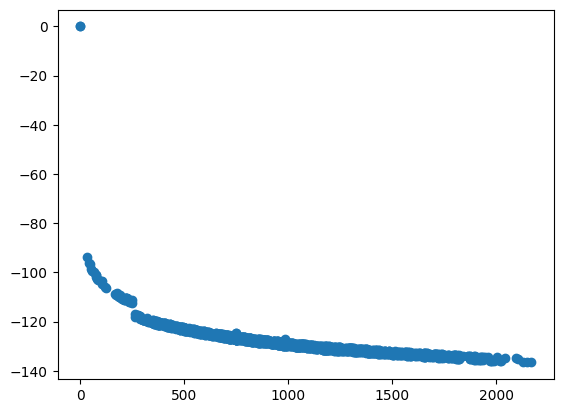

In [5]:
plt.scatter(x=df['Distance'],y=df['RSS'])


In [6]:
df['Distance'].corr(df['RSS'])

-0.6844781532665624

In [11]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Extract RSSI values and distances from the dataset
df=pd.read_csv(r'C:\Users\AAGAT SHUKLA\Desktop\Book3.csv')
rssi_values = df['RSS']
distances = df['Distance']

# Create feature matrix X (RSSI in milliwatts) with polynomial features
poly_degree = 8 # Set the degree of the polynomial
poly_features = PolynomialFeatures(degree=poly_degree)
X = poly_features.fit_transform(np.array(rssi_values).reshape(-1, 1))

# Create target vector y (distances in meters)
y = np.array(distances)

# Fit polynomial regression model
model = LinearRegression()
model.fit(X, y)

# Example RSSI measurement for distance estimation
test_rssi = -90

# Transform the test RSSI to polynomial features
test_rssi_poly = poly_features.transform([[test_rssi]])

# Predict distance using the trained polynomial regression model
predicted_distance = model.predict(test_rssi_poly)

print(f"Estimated distance for RSSI {test_rssi}: {predicted_distance} meters")

Estimated distance for RSSI -90: [116.27489466] meters


In [48]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
df=pd.read_csv(r'C:\Users\AAGAT SHUKLA\Desktop\Actual distance measurements.csv')
df.at[1,'0']



983.9232694

300


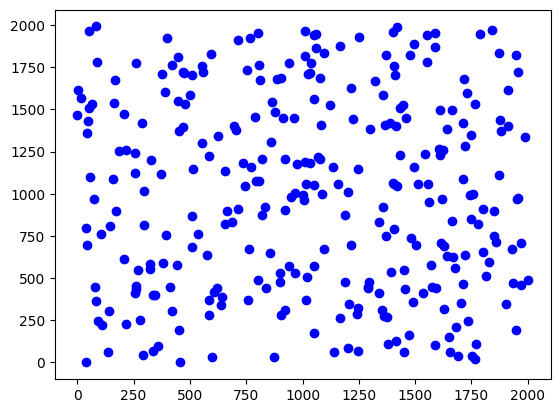

In [86]:
#TRILATERATION
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
df=pd.read_csv(r'C:\Users\AAGAT SHUKLA\Desktop\Actual distance measurements.csv')
cnt=0
X=[]
Y=[]
# Function to calculate the distances between estimated point and anchor nodes
def distances_from_point(point, anchors):
    distances = []
    for anchor in anchors:
        distance = np.linalg.norm(np.array(anchor[:2]) - np.array(point))
        distances.append(distance)
    return distances

# Function to minimize the weighted least squares objective
def minimize_objective(point, distances, weights):
    estimated_distances = distances_from_point(point, anchors)
    residual = np.subtract(estimated_distances, distances)
    return np.sum(weights * residual**2)

#distance=[df[:,62],df[:,135],df[:,197]]
# Example anchor nodes and measured distances
anchors = [(1956.230,977.582), (870.375,29.523), (8.1,1612.1)]
for i in range(300):
    distances =[df.at[i,'227'],df.at[i,'129'],df.at[i,'217']] 
    initial_estimate =(1000,1000)
    weights = np.ones(len(anchors))

# Minimize the objective function
    result = minimize(minimize_objective, initial_estimate, args=(distances, weights))

# Extract the estimated coordinates
    estimated_point = result.x
    estimated_x, estimated_y = estimated_point
    X.append(estimated_x)
    Y.append(estimated_y)
    cnt=cnt+1

    #print(f"Estimated target coordinates: ({estimated_x}, {estimated_y})")
    plt.plot(estimated_x,estimated_y,'bo')


print(cnt)


In [78]:
print(np.vstack((X,Y)).T.shape)

(300, 2)


C:\Users\AAGAT SHUKLA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\AAGAT SHUKLA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\AAGAT SHUKLA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\AAGAT SHUKLA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

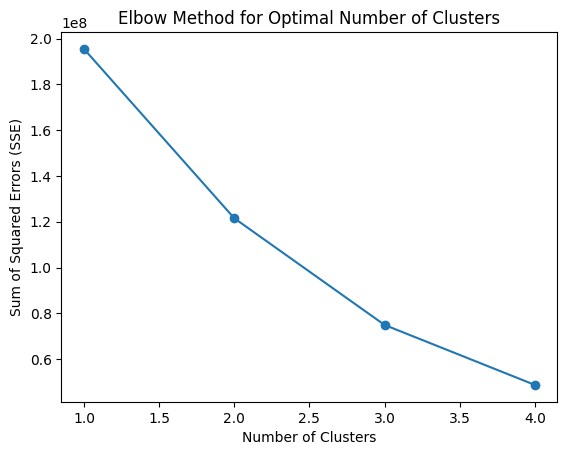

Enter the optimal number of clusters: 3


C:\Users\AAGAT SHUKLA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
Cluster 1: (407.6993175344403, 784.747778761658)
Cluster 2: (1143.7816125054858, 1560.6277236028575)
Cluster 3: (1520.3752976745984, 529.0589046434036)
Labels:
[1 0 0 0 2 2 0 2 1 1 0 0 2 1 0 2 2 1 1 2 1 0 1 1 1 2 1 2 2 2 1 2 1 2 1 2 1
 2 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 2 1 1 0 0 1 2 2 1 0 2 0 2 1 0 1 0 2 2 2 2
 1 0 1 1 0 2 0 2 1 2 0 0 0 2 1 1 0 2 0 2 1 0 2 2 0 1 1 1 1 1 2 1 1 0 1 0 1
 1 1 2 2 1 1 1 2 1 2 1 0 2 1 0 1 1 2 2 0 1 0 2 1 0 2 0 0 2 2 1 2 2 1 1 2 1
 1 2 1 2 2 0 2 1 1 2 1 0 1 0 2 2 1 2 1 2 1 2 2 2 1 1 2 2 1 1 2 1 2 1 2 1 0
 0 1 1 0 2 2 0 1 0 1 2 0 0 2 0 1 0 1 0 0 2 0 0 1 0 0 0 1 2 1 1 2 0 1 0 0 2
 0 1 0 1 0 2 0 1 2 2 2 1 0 0 0 1 0 2 0 0 1 0 0 2 0 2 1 1 1 2 2 0 0 1 2 1 0
 0 2 0 1 1 0 2 0 0 0 1 1 0 2 2 0 1 0 0 0 0 2 1 2 0 2 1 1 1 0 1 0 1 1 0 0 2
 2 1 1 2]


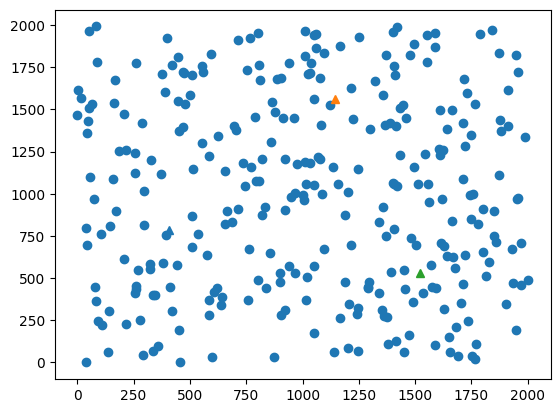

In [79]:
#K-means
from sklearn.cluster import KMeans
# UE locations obtained from trilateration (replace with your actual UE locations)

ue_locations = np.vstack((X,Y)).T

# Perform K-means clustering with different numbers of clusters
max_clusters = 4
sse = []  # Sum of Squared Errors

for num_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(ue_locations)
    cluster_centers = kmeans.cluster_centers_

    # Calculate the sum of squared errors (SSE)
    sse.append(np.sum(np.linalg.norm(ue_locations - cluster_centers[kmeans.labels_], axis=1) ** 2))

# Plot the SSE versus number of clusters
plt.plot(range(1, max_clusters + 1), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Determine the optimal number of clusters based on the elbow method
optimal_num_clusters = int(input("Enter the optimal number of clusters: "))

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters)
kmeans.fit(ue_locations)
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Print the cluster centers and labels
print("Cluster Centers:")
for i, center in enumerate(cluster_centers):
    print("Cluster {}: ({}, {})".format(i+1, center[0], center[1]))
    plt.plot(center[0],center[1],'^')

plt.scatter(ue_locations[:,0],ue_locations[:,1])       


print("Labels:")
print(labels)

C:\Users\AAGAT SHUKLA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\AAGAT SHUKLA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\AAGAT SHUKLA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\AAGAT SHUKLA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

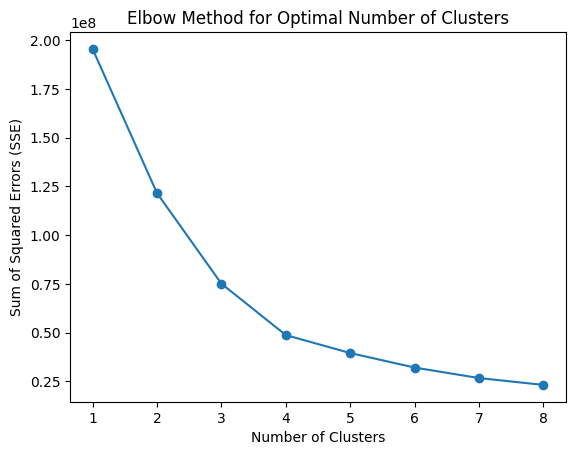

Enter the optimal number of clusters: 6


C:\Users\AAGAT SHUKLA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
Cluster 1: (1120.4766207100686, 1746.3127387733507)
Cluster 2: (389.8882351335275, 412.7327967306138)
Cluster 3: (1670.8506515299273, 1325.512117676094)
Cluster 4: (318.04088486732826, 1488.2663756289091)
Cluster 5: (1557.9247587429595, 413.9359028083793)
Cluster 6: (945.5010370500021, 941.5111262667058)


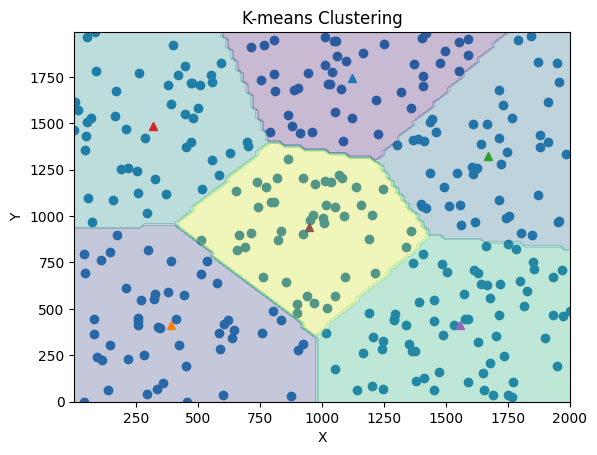

Labels:
[5 1 1 5 1 4 1 2 2 0 1 3 5 5 3 4 4 0 2 2 0 3 2 5 3 4 0 4 4 4 0 4 0 4 0 1 3
 2 1 0 0 5 2 3 3 2 2 2 5 3 3 0 1 2 0 2 1 1 3 4 4 0 3 4 1 4 5 1 0 5 4 4 2 5
 2 1 0 2 1 4 1 4 0 4 1 3 1 4 0 2 1 4 3 5 5 1 4 2 3 2 2 0 5 2 4 0 3 1 0 1 0
 2 2 4 4 5 0 5 4 3 4 0 1 4 0 1 2 5 2 1 3 3 3 4 5 1 4 5 3 4 4 2 4 4 3 5 4 5
 3 4 3 4 4 3 4 3 5 4 0 5 2 1 4 5 3 2 3 4 2 2 2 5 0 2 4 4 2 0 4 2 4 0 4 0 5
 1 0 3 1 4 2 1 0 3 0 5 1 5 2 3 2 5 0 1 5 4 5 1 0 5 1 1 3 4 0 0 4 3 0 1 3 4
 1 2 1 5 1 2 5 0 4 4 5 3 3 1 1 2 3 4 1 3 0 5 3 4 3 4 2 3 0 2 4 3 1 2 5 3 1
 1 4 5 3 0 5 4 3 1 1 5 2 1 4 4 1 5 3 5 1 5 4 2 4 1 2 5 0 2 5 5 5 0 0 3 3 4
 4 2 0 4]


In [84]:
#K-means Finalised
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# UE locations obtained from trilateration (replace with your actual UE locations)
ue_locations = np.vstack((X, Y)).T

# Perform K-means clustering with different numbers of clusters
max_clusters = 8
sse = []  # Sum of Squared Errors

for num_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(ue_locations)
    cluster_centers = kmeans.cluster_centers_

    # Calculate the sum of squared errors (SSE)
    sse.append(np.sum(np.linalg.norm(ue_locations - cluster_centers[kmeans.labels_], axis=1) ** 2))

# Plot the SSE versus number of clusters
plt.plot(range(1, max_clusters + 1), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Determine the optimal number of clusters based on the elbow method
optimal_num_clusters = int(input("Enter the optimal number of clusters: "))

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters)
kmeans.fit(ue_locations)
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Print the cluster centers and labels
print("Cluster Centers:")
for i, center in enumerate(cluster_centers):
    print("Cluster {}: ({}, {})".format(i + 1, center[0], center[1]))
    plt.plot(center[0], center[1], '^')

plt.scatter(ue_locations[:, 0], ue_locations[:, 1])
plt.xlabel('X')
plt.ylabel('Y')

# Draw the regions of all clusters
x_min, x_max = np.min(ue_locations[:, 0]), np.max(ue_locations[:, 0])
y_min, y_max = np.min(ue_locations[:, 1]), np.max(ue_locations[:, 1])
x_range = np.linspace(x_min, x_max, 100)
y_range = np.linspace(y_min, y_max, 100)
xx, yy = np.meshgrid(x_range,y_range)
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)

plt.title('K-means Clustering')
plt.show()

print("Labels:")
print(labels)


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
im = cv2.imread(r'C:\Users\AAGAT SHUKLA\Desktop\rss dataset\Network Topology.png')

# Define the blue colour we want to find - remember OpenCV uses BGR ordering
blue = [0,0,255]

# Get X and Y coordinates of all blue pixels
Y, X = np.where(np.all(im==blue,axis=2))

for x,y in zip(X,Y):
    plt.plot(x, y)
    label=f"({x},{y})"
    plt.annotate(label,(x,y),ha='center')

plt.imshow(im)

#print(X,Y)

Error in callback <function _draw_all_if_interactive at 0x000001BDB6D20040> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001BDB71132E0> (for post_execute):


KeyboardInterrupt: 

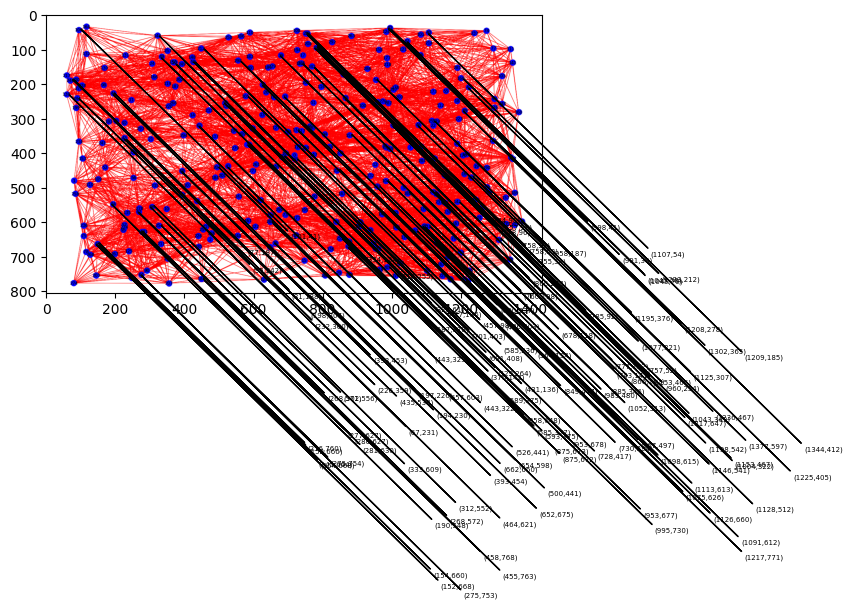

In [68]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# Load image
im = cv2.imread(r'C:\Users\AAGAT SHUKLA\Desktop\rss dataset\Network Topology.png')
plt.imshow(im)
# Define the blue colour we want to find - remember OpenCV uses BGR ordering
red = [0,0,9]

# Get X and Y coordinates of all blue pixels
Y, X = np.where(np.all(im==red,axis=2))
zipped = np.column_stack((X,Y))
for x,y in zipped:
      plt.plot(x, y)
      label=f"({x},{y})"
      n=random.randint(500, 1000)
      plt.annotate(label,(x,y),fontsize=5, xytext=(x+n,y+n),arrowprops=dict(facecolor='black',width=0.01,headwidth=0.1))




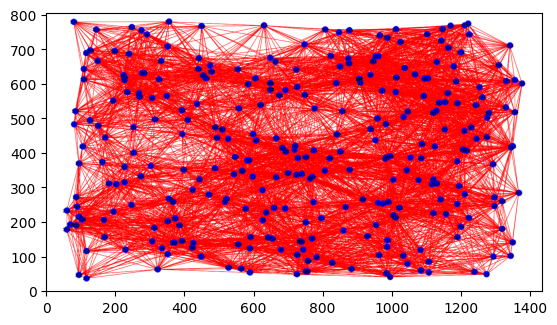

In [3]:
import numpy as np
from matplotlib.backend_bases import MouseButton
import matplotlib.pyplot as plt
import cv2
import random

im = cv2.imread(r'C:\Users\AAGAT SHUKLA\Desktop\rss dataset\Network Topology.png')
plt.imshow(im, origin='lower')

X = []
Y = []


def on_click(event):
    if event.button is MouseButton.LEFT:
        x = event.xdata * (2000 / 1400)
        y = event.ydata * (2000 / 800)
        X.append(x)
        Y.append(y)
        print(f'data coords: {x}, {y}')

        # Offset calculation
        offset_x = random.randint(1, 5)
        offset_y = random.randint(1, 5)

        #plt.annotate(f"({x:.2f}, {y:.2f})", (event.xdata, event.ydata),
                   #  xytext=(offset_x, offset_y), textcoords='offset points', color='black',fontsize=3)



plt.connect('button_press_event', on_click)

plt.show()


In [30]:
zipped = np.column_stack((X,Y))
print(np.size(zipped))

618


In [31]:
  print(zipped)
   

[[1067   46]
 [1346   52]
 [ 666   56]
 [1311   59]
 [ 664   63]
 [ 666   64]
 [ 818   64]
 [ 635   67]
 [ 644   71]
 [ 644   72]
 [1124   87]
 [ 899   90]
 [1183   93]
 [ 858  100]
 [1374  102]
 [ 854  103]
 [1366  103]
 [ 528  105]
 [ 858  106]
 [ 523  109]
 [1419  110]
 [ 797  113]
 [ 187  118]
 [ 196  120]
 [ 300  122]
 [ 821  122]
 [1155  122]
 [ 407  125]
 [ 661  126]
 [ 754  129]
 [1061  130]
 [ 409  132]
 [1066  137]
 [ 502  138]
 [ 501  141]
 [ 504  143]
 [ 498  144]
 [ 626  144]
 [ 501  147]
 [ 498  148]
 [ 814  148]
 [ 802  150]
 [ 373  151]
 [ 818  151]
 [1063  155]
 [ 714  157]
 [ 245  158]
 [1262  158]
 [ 239  159]
 [1002  161]
 [ 719  163]
 [1267  164]
 [ 663  165]
 [ 723  165]
 [ 245  166]
 [ 932  179]
 [ 932  180]
 [1398  185]
 [ 134  187]
 [1398  188]
 [ 242  208]
 [ 234  209]
 [ 175  210]
 [ 234  210]
 [ 426  210]
 [ 445  212]
 [ 167  215]
 [1086  215]
 [ 169  218]
 [ 871  219]
 [1076  227]
 [1195  227]
 [1085  228]
 [1232  232]
 [ 703  234]
 [ 129  235]
 [ 734  243]

Text(429, 793, '(429,793)')

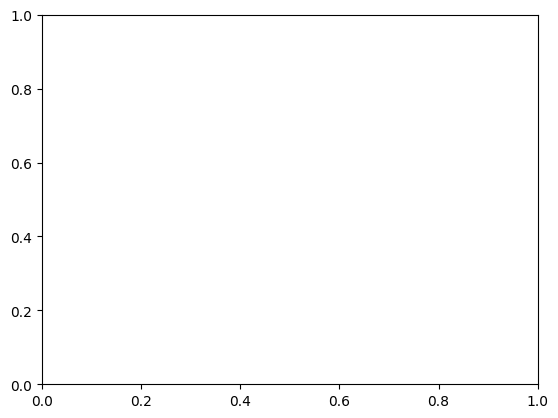

In [16]:
    label=f"({x},{y})"
    plt.annotate(label,(x,y))

In [73]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image as image

# Load image
im = image.open(r'C:\Users\AAGAT SHUKLA\Desktop\rss dataset\Network Topology.png')
pixel_val=list(im.getdata())
print(pixel_val)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



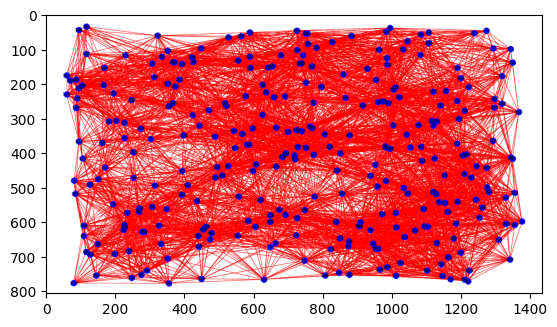

In [77]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# Load image
im = cv2.imread(r'C:\Users\AAGAT SHUKLA\Desktop\rss dataset\Network Topology.png')
plt.imshow(im)
# Define the blue colour we want to find - remember OpenCV uses BGR ordering
red = [0,0,255]

def mouse_event(event):
    print('x: {} and y: {}'.format(event.xdata, event.ydata))
# Get X and Y coordinates of all blue pixels
Y, X = np.where(np.all(im==red,axis=2))
zipped = np.column_stack((X,Y))
for x,y in zipped:
      plt.plot(x, y,'-')
      #label=f"({x},{y})"
      #n=random.randint(500, 1000)
      #plt.annotate(label,(x,y),fontsize=5, xytext=(x+n,y+n),arrowprops=dict(facecolor='black',width=0.01,headwidth=0.1))

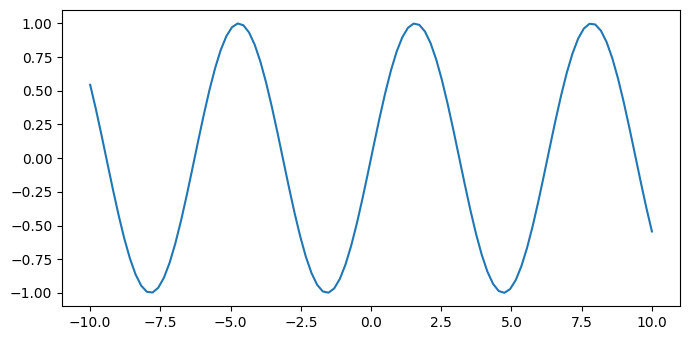

In [78]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

def mouse_event(event):
    print('x: {} and y: {}'.format(event.xdata, event.ydata))

fig = plt.figure()
cid = fig.canvas.mpl_connect('button_press_event', mouse_event)

x = np.linspace(-10, 10, 100)
y = np.sin(x)

plt.plot(x, y)

plt.show()

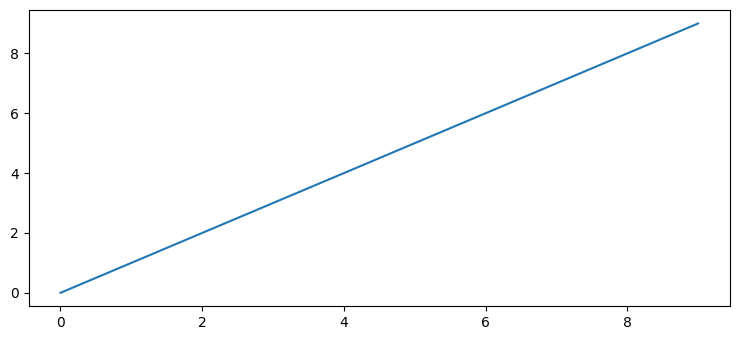

In [79]:
from matplotlib import pyplot as plt

plt.rcParams['backend'] = 'TkAgg'
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Function to print mouse click event coordinates
def onclick(event):
   print([event.xdata, event.ydata])

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot a line in the range of 10
ax.plot(range(10))

# Bind the button_press_event with the onclick() method
fig.canvas.mpl_connect('button_press_event', onclick)

# Display the plot
plt.show()

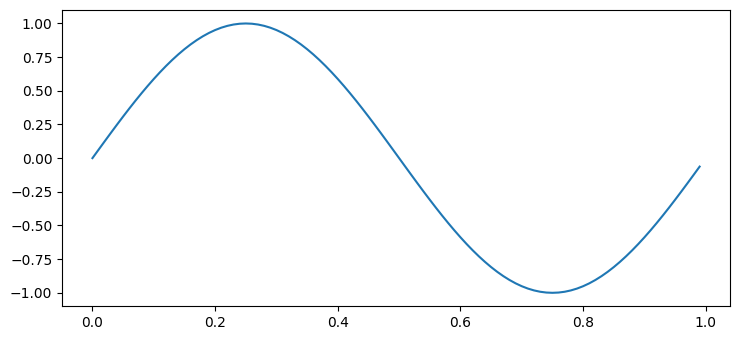

In [80]:
from matplotlib.backend_bases import MouseButton
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2 * np.pi * t)
fig, ax = plt.subplots()
ax.plot(t, s)


def on_move(event):
    if event.inaxes:
        print(f'data coords {event.xdata} {event.ydata},',
              f'pixel coords {event.x} {event.y}')


def on_click(event):
    if event.button is MouseButton.LEFT:
        print('disconnecting callback')
        plt.disconnect(binding_id)


binding_id = plt.connect('motion_notify_event', on_move)
plt.connect('button_press_event', on_click)

plt.show()

#### from matplotlib.backend_bases import MouseButton
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 1.0, 0.01) = np.sin(2 * np.pi * t)
fig, ax = plt.subplots()
ax.plot(t, s)


def on_move(event):
    if event.inaxes:
        print(f'data coords {event.xdata} {event.ydata},',
              f'pixel coords {event.x} {event.y}')


def on_click(event):
    if event.button is MouseButton.LEFT:
        print('disconnecting callback')
        plt.disconnect(binding_id)


binding_id = plt.connect('motion_notify_event', on_move)
plt.connect('button_press_event', on_click)

plt.show()